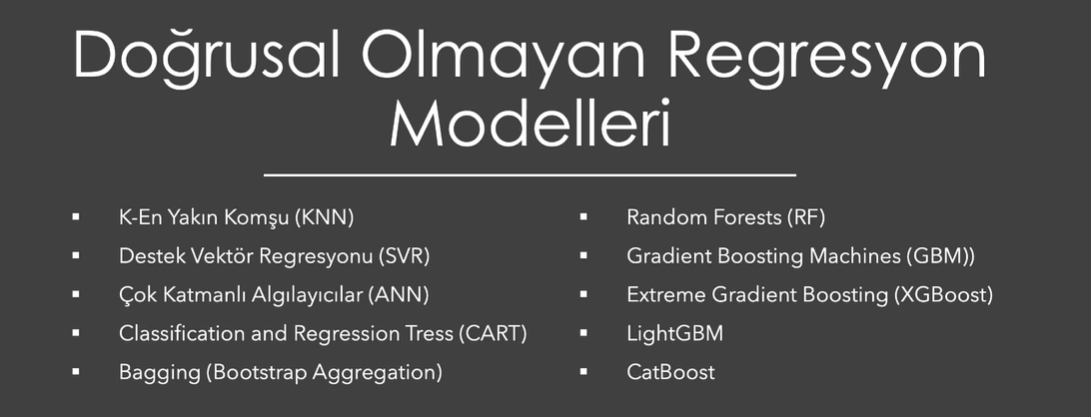

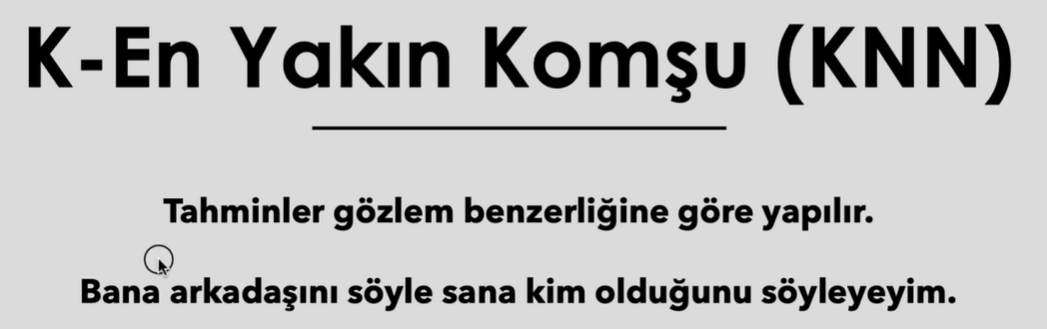

In [ ]:
Büyük veri setleri için uygun olduğu söylenemez. Ancak kullanımı kolay olduğundan dolayı tercih edilir.

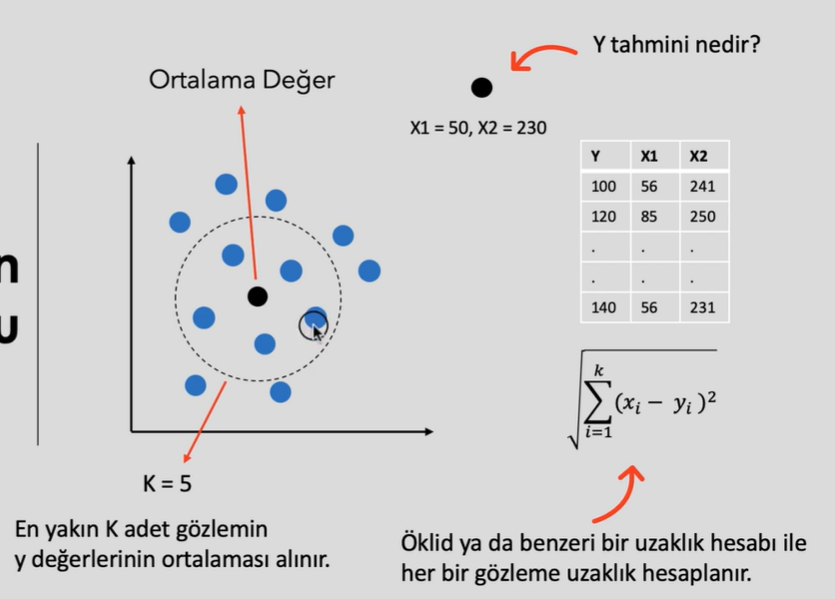

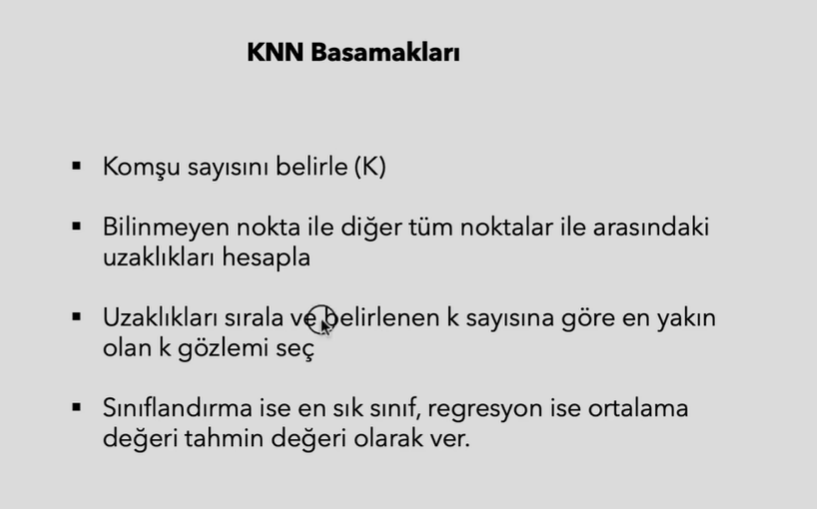

# Doğrusal Olmayan Regreson Modelleri

In [64]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors

5

In [7]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))   # test hatası.

426.6570764525201

In [10]:
# farklı k değerleri için RMSE nin nasıl değiştiğini görüyoruz.(train üzerinde)

RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [11]:
from sklearn.model_selection import GridSearchCV  # parametre seti verilerek tüm olası kombinasyonların denenmesi durumudur.

In [12]:
knn_params = {'n_neighbors': np.arange(1,30,1)}  # algoritmanın kabul ettiği parametrenin ismi ne ise onu veriyoruz.

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)  # argümanları ve cv yi girdik.

In [15]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
knn_cv_model.best_params_["n_neighbors"]  # tüm parametreleri uyguladı ve en uygun parametre değeri olarak 8 buldu.

8

In [17]:
RMSE = []     # cv edilmemis
RMSE_CV = []  # cv edilmiş
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

# Burada küçük olanı aramıyoruz. Bu bizim için aldatıcı olur. ikisi arasındaki değişim aralığına bakmak gerekir.

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [18]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])  # final modelin nesnesini bulduk.

In [19]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [20]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))  # knn modeli test ettiğimiz test hatası.

413.7094731463598

# SVR (Destek Vektör Regresyonu)

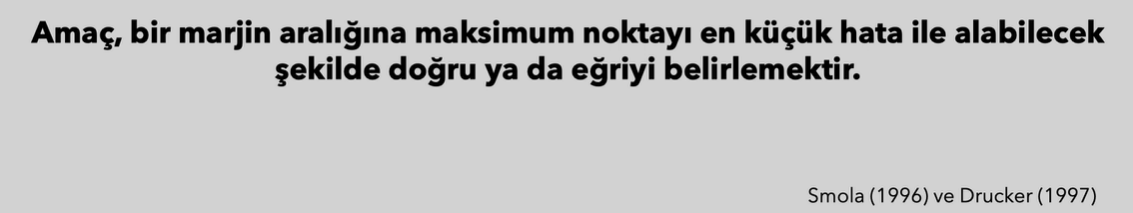

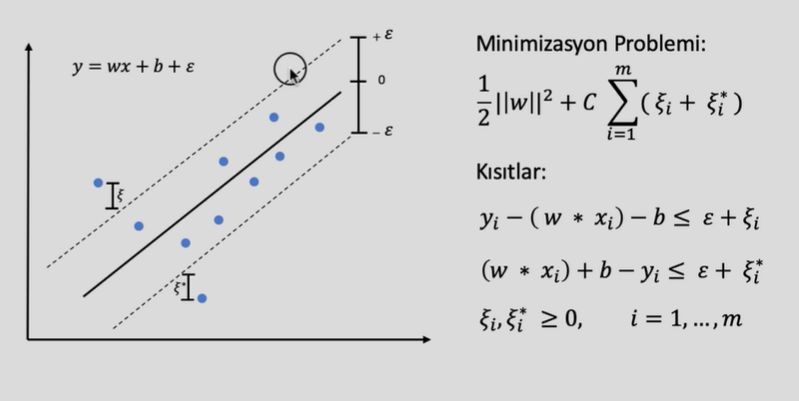

In [21]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [22]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [23]:
from sklearn.svm import SVR

In [24]:
svr_model = SVR("linear").fit(X_train, y_train)

In [25]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [26]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [27]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [28]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [29]:
y_pred = svr_model.predict(X_train)

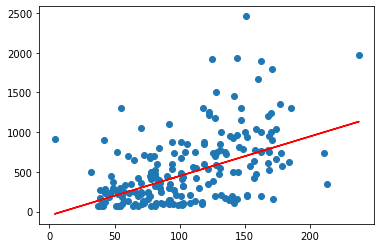

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [31]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [32]:
-8.814095480334572 + 5.1724561354706875*91   # linear regression tahmini. SVR tahmini ise 403 idi.

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

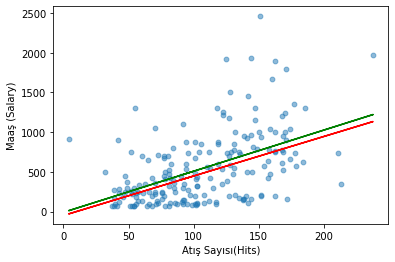

In [33]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)  # yukarıdaki iki modeli üst üste çakıştırdığımızda aşağıdakı grafik oluşur.
plt.plot(X_train, lm_pred, 'g')       # linear Regression ait
plt.plot(X_train, y_pred, color='r')  # SVR ait

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [34]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [35]:
svr_model.predict([[91]])

array([403.52804878])

In [36]:
y_pred = svr_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))   # test hatası.

459.0187960365147

In [38]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [39]:
svr_model

SVR(kernel='linear')

In [40]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [42]:
pd.Series(svr_cv_model.best_params_)[0]  # bize önerdiği en iyi parametre.

0.1

In [43]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [44]:
y_pred = svr_tuned.predict(X_test)   # model üzerinden bir tahmin işlemi yaptık.

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))   # test hatası.

458.198966781116

# Doğrusal Olmayan SVR

In [47]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [48]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

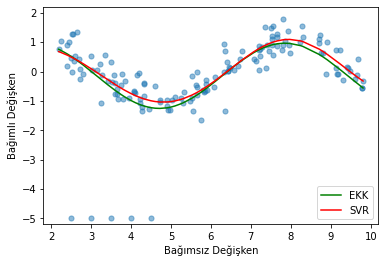

In [49]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [50]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [51]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin

In [52]:
y_pred = svr_rbf.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))  # ilkel test hata değerimiz. Bütün değişkenleri kullanarak doğrusal olmayan bir formda model kurduk.

460.0032657244849

## Model Tuning

In [61]:
svr_rbf

SVR()

In [62]:
svr_params = {"C": [0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [63]:
svr_cv_model.best_params_

{'C': 50}

In [64]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [65]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [66]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# Çok Katmanlı Algılayıcı

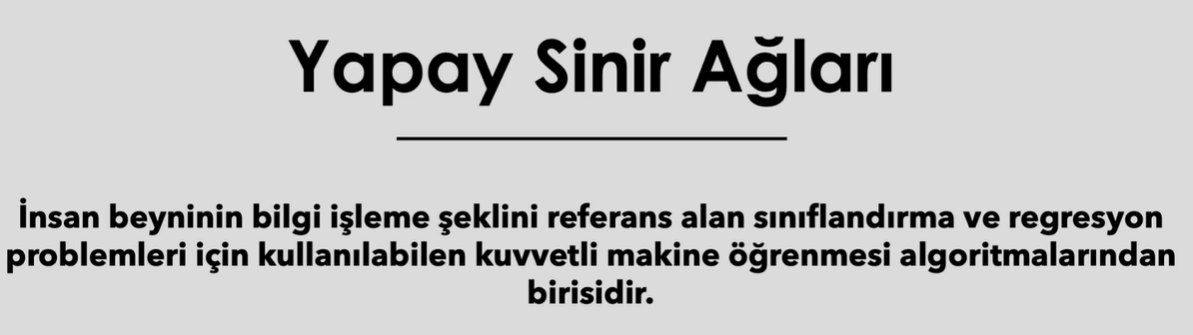

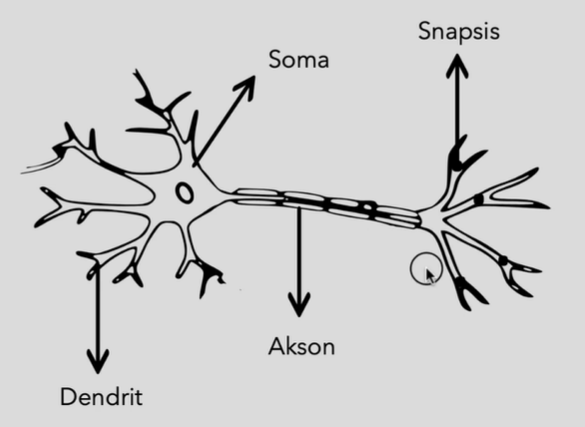

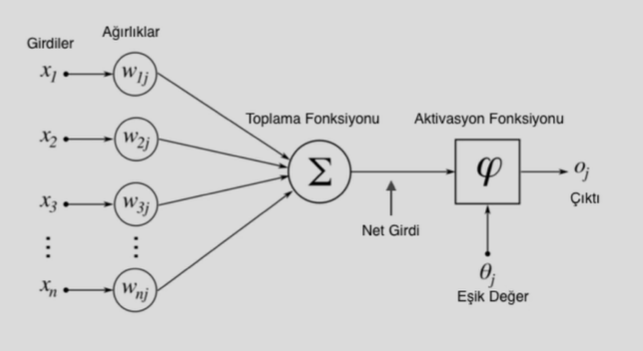

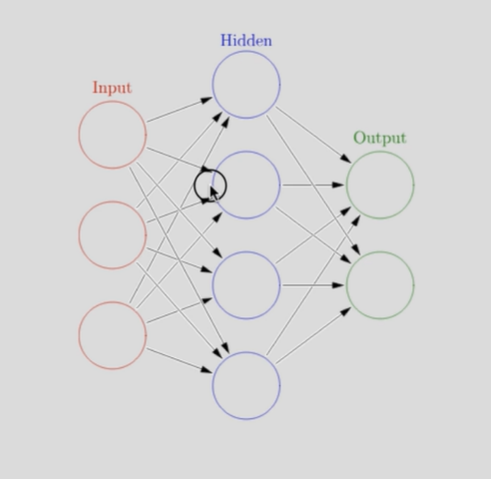

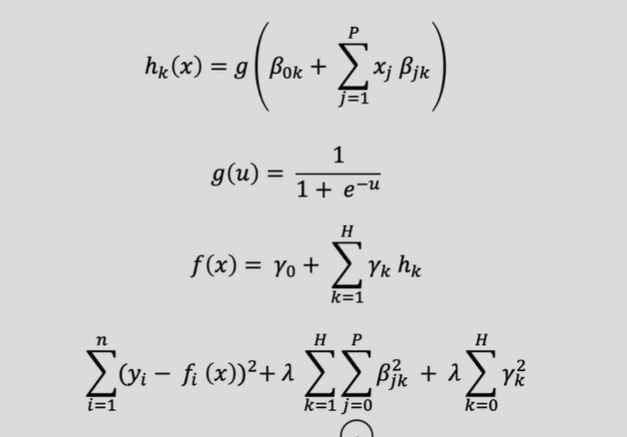

In [67]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler   # dönüştürme işlemleri algoritmaların hepsi sever.

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [70]:
X_train_scaled = scaler.transform(X_train)

In [71]:
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.neural_network import MLPRegressor

In [74]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [75]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [76]:
mlp_model.n_layers_  # katmanın kendisi.

4

In [77]:
mlp_model.hidden_layer_sizes   # katmanın elemanlarını. gi

(100, 20)

## Tahmin

In [78]:
y_pred = mlp_model.predict(X_test_scaled)

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

424.0028347953505

## Model Tuning

In [80]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [81]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [82]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [83]:
mlp_cv_model.fit(X_train_scaled, y_train)  # 4-5 dk. sürüyor. 

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [84]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [85]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [86]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [87]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))   # test hatasını verir.

361.77739022461884

# CART

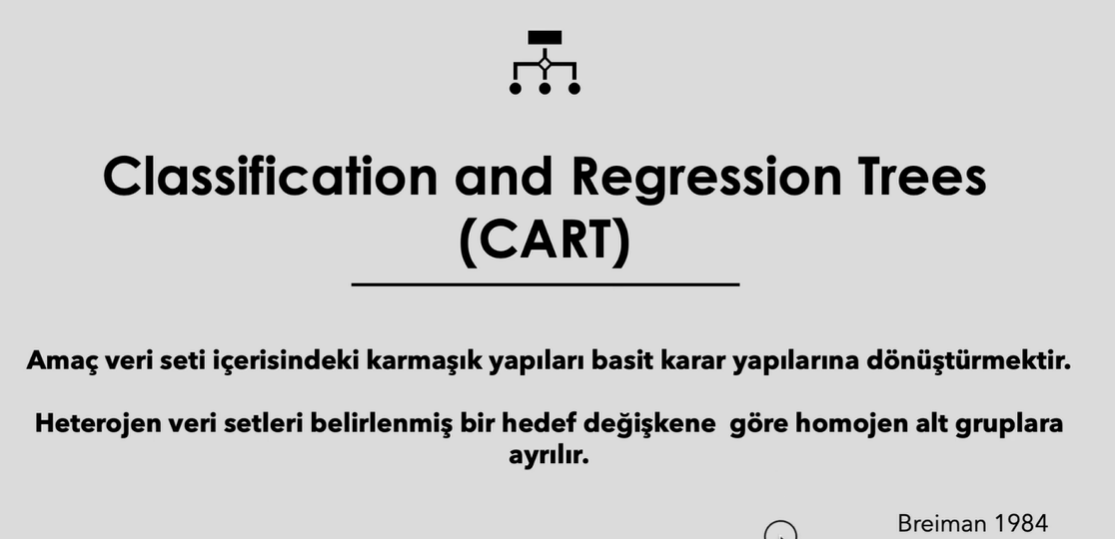

In [ ]:
Hem sınıflama hem de regresyon için kullanılabilmektedir. Sonraki modellerin temellerini oluşturur.

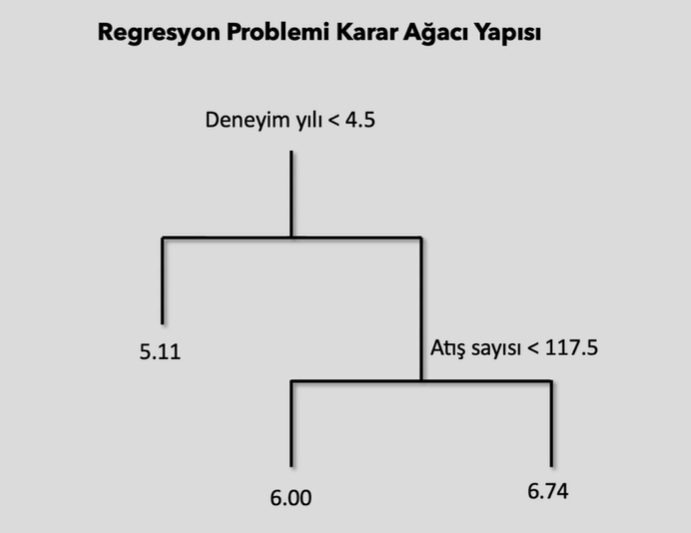

In [ ]:
En tepedeki en önemli değişkendir. Deneyim yılı 4.5 dan küçük ise Atış sayısının maaşa etkisi yoktur yukarıdaki örneğe göre.

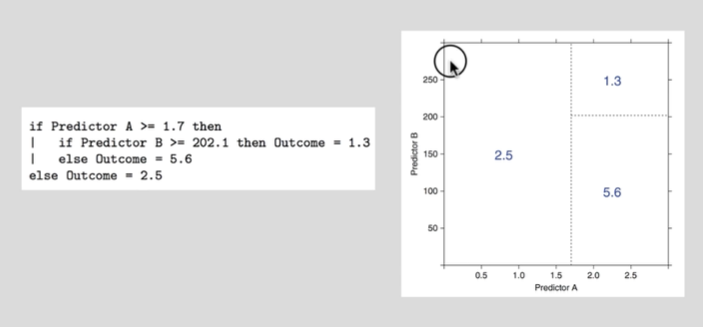

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [5]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)  # max_leaf_nodes=3 yaptığımızda grafikte oluşan farkı görebiliriz.  

In [6]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) crit

In [7]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

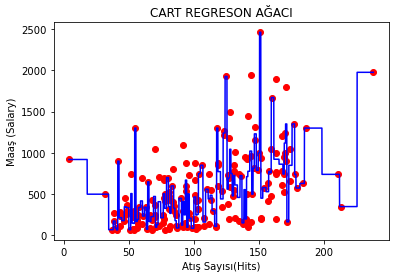

In [8]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 

plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  

plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [9]:
# !pip install skompiler

In [14]:
# pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
from skompiler import skompile

In [11]:
print(skompile(cart_model.predict).to('python/code'))

ModuleNotFoundError: No module named 'astor'

## Tahmin

In [18]:
x = [91]

In [13]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [19]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [20]:
cart_model.predict([[91]])

array([125.])

In [21]:
y_pred =cart_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [23]:
cart_model = DecisionTreeRegressor()   # max_leaf_nodes=10, min_samples_split=2 eklendiğinde hata değeri düşüyor.
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [25]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [26]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [27]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [28]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [29]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [30]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [31]:
y_pred = cart_tuned.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

# Bagged Trees Regresyon

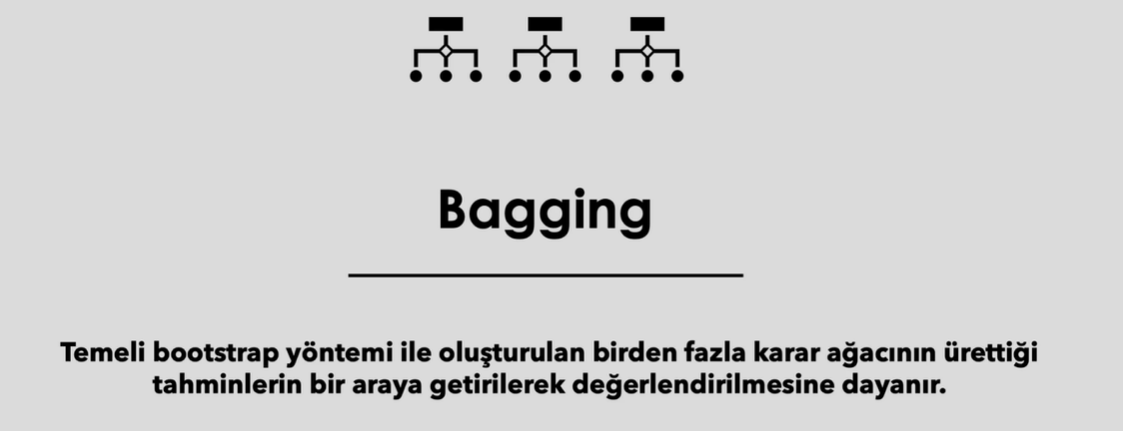

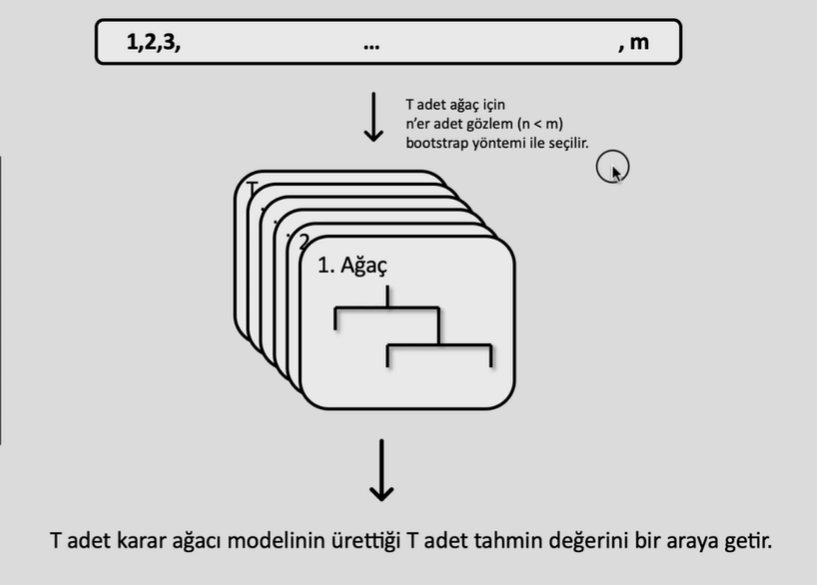

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [5]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [6]:
bag_model.n_estimators

10

In [7]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=806385942),
 DecisionTreeRegressor(random_state=938697155),
 DecisionTreeRegressor(random_state=1788154275),
 DecisionTreeRegressor(random_state=2010300162),
 DecisionTreeRegressor(random_state=1311349801),
 DecisionTreeRegressor(random_state=1590127963),
 DecisionTreeRegressor(random_state=1318217271),
 DecisionTreeRegressor(random_state=163328218),
 DecisionTreeRegressor(random_state=10861571),
 DecisionTreeRegressor(random_state=1669087711)]

In [8]:
bag_model.estimators_samples_   # her bir ağaçtan farklı örnekler alıyor.

[array([ 12, 109,  60, 165, 101,  40,  46, 180,  44, 121, 193, 179,   1,
        145,   7, 108, 159,  79, 181, 143,  25, 103,  47,  16,  89, 156,
          2, 100, 111, 134, 196,  67,  63, 132,  47, 189, 194, 117, 192,
         69,  85,  18, 189, 162,  23,  82,  42,  50, 155,  16, 132, 142,
         96,  18, 163, 111, 165, 104, 171,  92, 186, 127, 188, 106, 152,
        154,  59, 117,  12,  21, 186,   4, 103,  86,  50, 108, 164, 175,
         40, 167,  12,  33,  73, 181, 125,  59,  50,  63,  78,  78, 102,
        155,   4, 117, 175, 103, 157,  50,  98, 179, 184, 141, 149,  62,
          4,  69, 173,  17,  23,  40, 106, 118, 132, 183, 175, 115,  17,
          6,  74,  13,  93, 190, 195,  91, 165,  11, 146,  51,  17, 120,
        144, 152,  29,  63,  59, 167, 145,  91,   2,  89,  10, 126, 128,
         79,  16, 138,  44,  93, 157,  66,  49, 192, 135, 172,  40, 172,
         44, 108,   2,  37,  32, 194, 101,  79,  45, 172,  77, 100,  96,
         50,  14, 182,  92,  17,  64,  22, 181,  36

In [9]:
bag_model.estimators_features_    # bütün ağaçların kullandığı değişken ve indeksleri. 

[array([18, 16,  6, 15,  8,  6,  7,  8,  3, 14,  1, 16,  8,  5, 16, 12,  6,
         3, 14]),
 array([ 3, 14,  5, 17, 16,  9, 14,  3, 18, 11, 14, 14, 10,  0, 17, 14, 14,
        11,  4]),
 array([ 3,  8,  8, 13,  6,  1,  2, 16,  0,  2,  6,  7,  1, 10, 18, 11, 16,
         7,  4]),
 array([ 2, 10, 16,  7,  0,  6, 18,  2,  9, 11, 14,  2,  5, 18, 14,  0, 12,
         6, 16]),
 array([ 9,  6,  0,  4,  9,  6, 11, 17,  9, 16, 11,  5,  4,  5,  6,  9,  9,
         9,  6]),
 array([17,  6, 14, 12, 13,  9, 16, 17,  7,  7, 12, 12,  6, 17,  7, 12, 15,
         0,  6]),
 array([14,  0, 10, 12,  8,  9, 15, 18, 13,  8, 10, 17,  6,  4, 18,  0, 17,
         5,  9]),
 array([ 2,  2,  2,  9, 16, 14,  8,  9,  6,  4,  2,  5,  8,  2, 18, 10,  6,
         3, 11]),
 array([ 3,  9, 18, 18,  4, 16,  5, 14,  5, 12, 12,  4, 12, 10, 15,  5, 10,
        15, 10]),
 array([ 6,  4,  9,  3,  4,  4,  3,  7,  5, 17, 17, 16,  4,  4, 10,  9, 14,
        10,  7])]

In [10]:
bag_model.estimators_[1]  # herbir modele ilişkin özellikleri getiriyor. Buradaki 1 nolu model.

DecisionTreeRegressor(random_state=938697155)

## Tahmin

In [11]:
y_pred = bag_model.predict(X_test)   # native test hatası. Bu ise topluluktakı tüm ağacların test hataları ortalaması.

In [12]:
np.sqrt(mean_squared_error(y_test, y_pred))

332.20954486592814

In [13]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)  # 2 nolu ağacın test hatası

In [14]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

457.0405887998517

In [17]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)   # 7 nolu ağacın test hatası

In [18]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

501.74876245688455

# Model Tuning

In [20]:
bag_model = BaggingRegressor(bootstrap_features = True)  # bagging aslında bir metedoloji olarak değerlendirmek lazım.
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [21]:
bag_params = {"n_estimators": range(2,20)}

In [22]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [23]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [24]:
bag_cv_model.best_params_

{'n_estimators': 10}

In [25]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [26]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [27]:
y_pred = bag_tuned.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))  

346.457987188104

# Random Forests

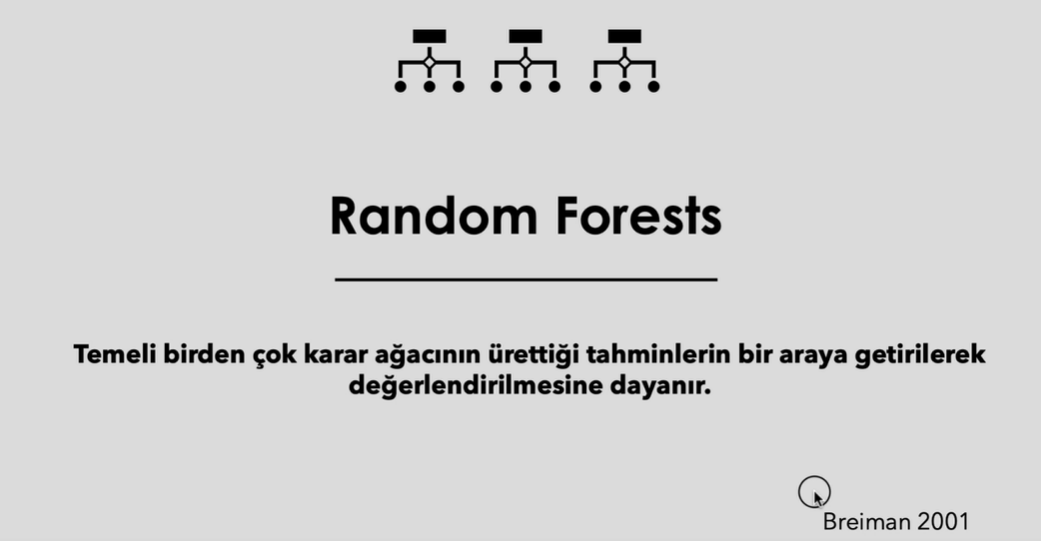

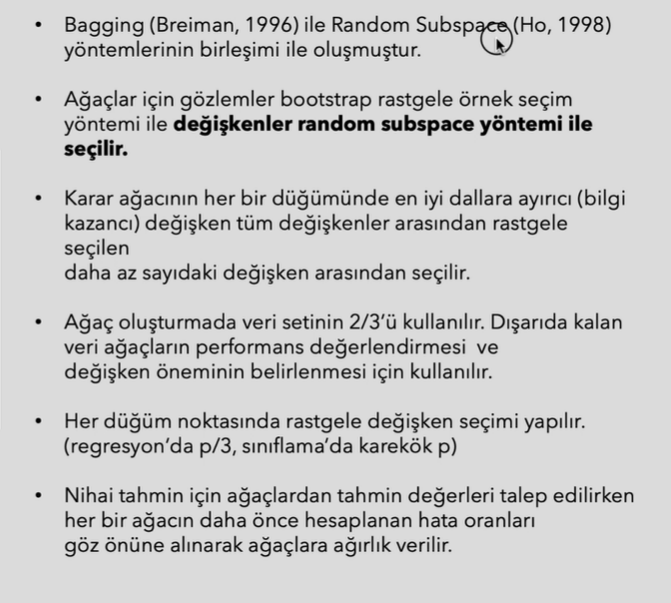

In [29]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf_model = RandomForestRegressor(random_state = 42)

In [32]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [33]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [34]:
y_pred = rf_model.predict(X_test)   # native test hatası.

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [36]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}  # random forest ta 500 ve 1000 iyi çalıştığı söylenir.

In [37]:
rf_model = RandomForestRegressor(random_state = 42)

In [38]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1)  # işlemcilerin tam performans ile çalışmasını sağlar. Çünkü çok sayıda parametre oluştu.

In [39]:
rf_cv_model.fit(X_train, y_train)   # çok uzun sürüyor ve tüm CPU kullanıyor.

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [40]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [41]:
rf_tuned = RandomForestRegressor(max_depth  = 8,    # final modelimizi tekrar oluşturduk.
                                 max_features = 3, 
                                 n_estimators =200)

In [42]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [43]:
y_pred = rf_tuned.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))  # bagging sonucu çıkan hataya yakın çıkması beklenir. Bagging , aslında random forest in özel bir alidir.

337.94272758912246

In [45]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

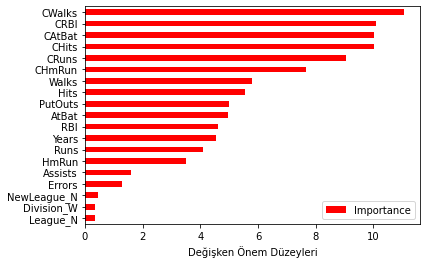

In [46]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

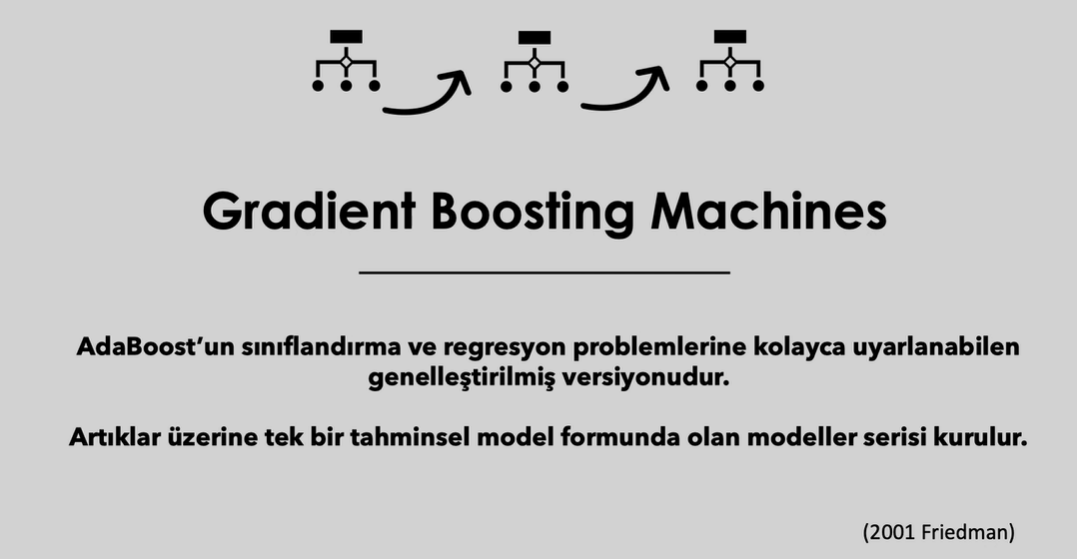

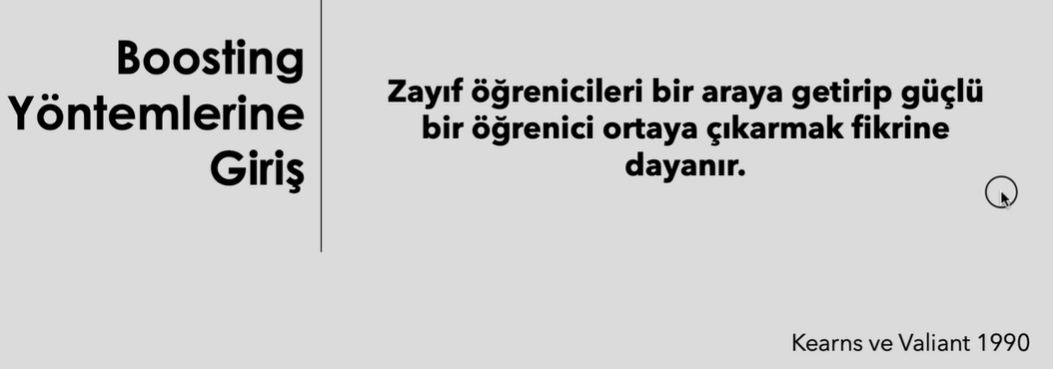

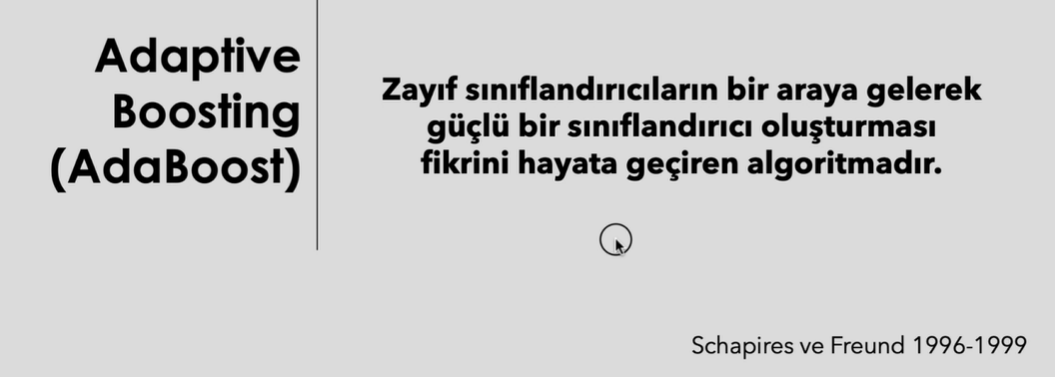

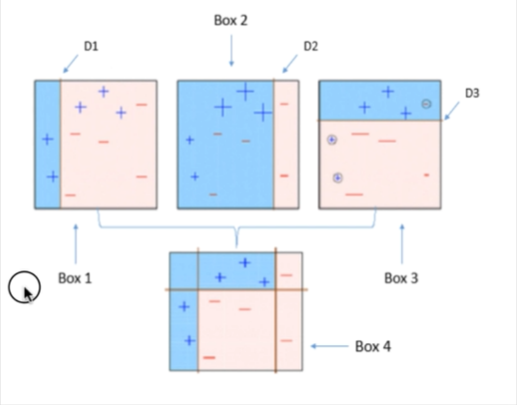

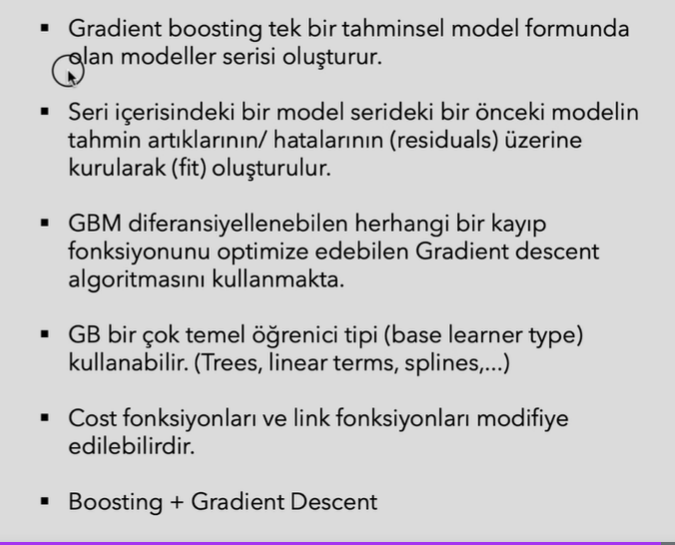

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [52]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))   # native test hatası.

351.11639701723806

## Model Tuning

In [53]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [54]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)  # -1 den dolayı uzun sürecek.
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [55]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.75}

In [57]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 3, 
                                      n_estimators = 200, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [58]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

322.8409948186971

In [59]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

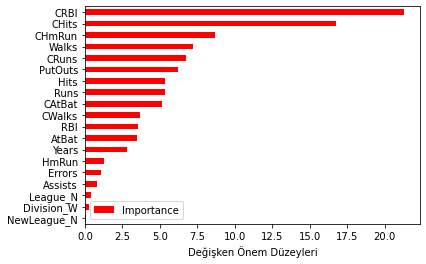

In [60]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

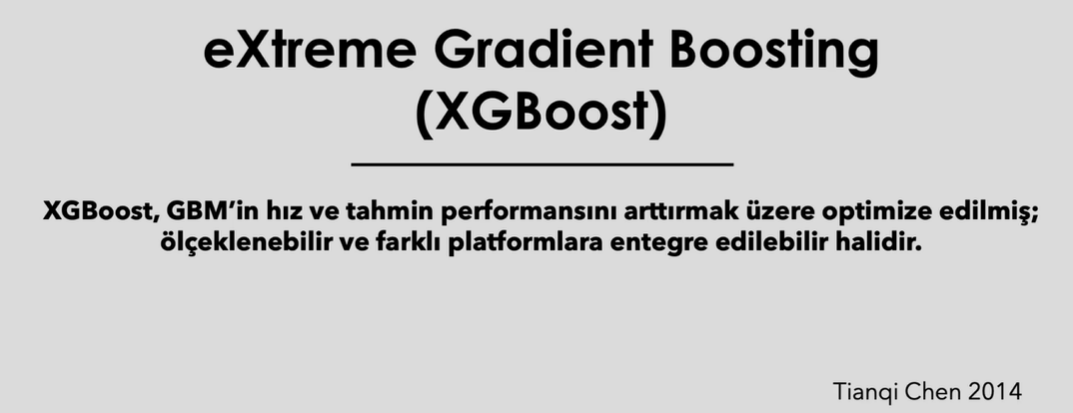

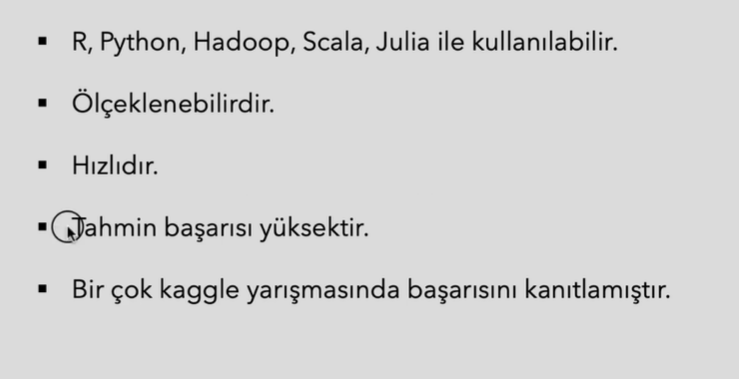

In [61]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [66]:
#!pip install xgboost

In [67]:
import xgboost as xgb  # xgboost un kendi veri yapısını kullanırsak daha hızlı sonuç alabiliriz.

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)  # modeller, xgboost kendi veri yapısı ile bu şekilde kurulabiliyor.
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [68]:
from xgboost import XGBRegressor

In [69]:
xgb_model = XGBRegressor().fit(X_train, y_train)  # ancak her ihtimale karşı modeli bu şkeilde kuruyoruz.

## Tahmin

In [70]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [71]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1],   # ağac başına değişkenlerden alınacak örnek sayısı.
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]   # overfitting engellemek için kullanılan parametre.
}


In [89]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)   # n_jobs = -1 çok uzun sürüyor.


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [73]:
xgb_cv.best_params_

NameError: name 'xgb_cv' is not defined

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Light GBM

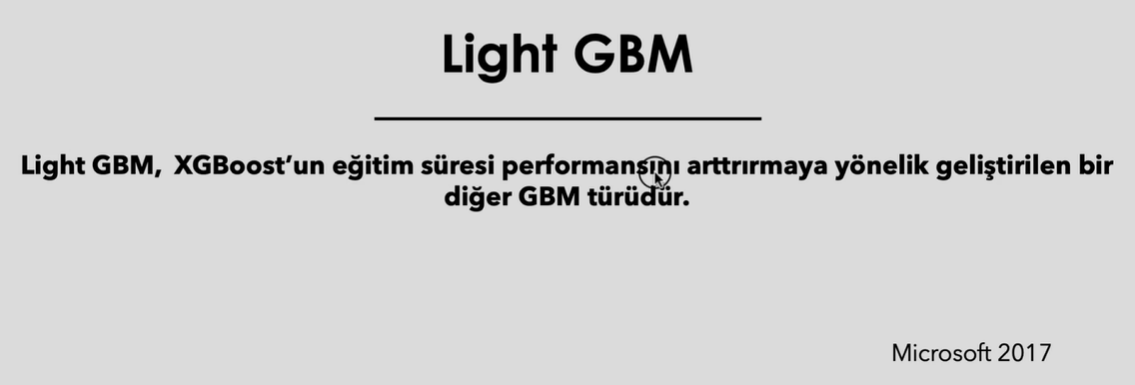

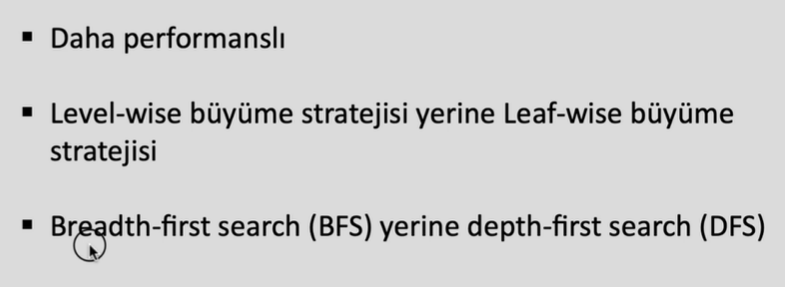

In [74]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [76]:
# !pip install lightgbm

In [77]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [78]:
from lightgbm import LGBMRegressor

In [79]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [80]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [82]:
lgbm_model

LGBMRegressor()

In [83]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, n_jobs = -1, cv=10, verbose = 2)  # n_jobs = -1  çok uzun sürüyor.CPU tam performans kullanıyor.

In [84]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, lear

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [85]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [86]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [87]:
y_pred = lgbm_tuned.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

# CatBoost

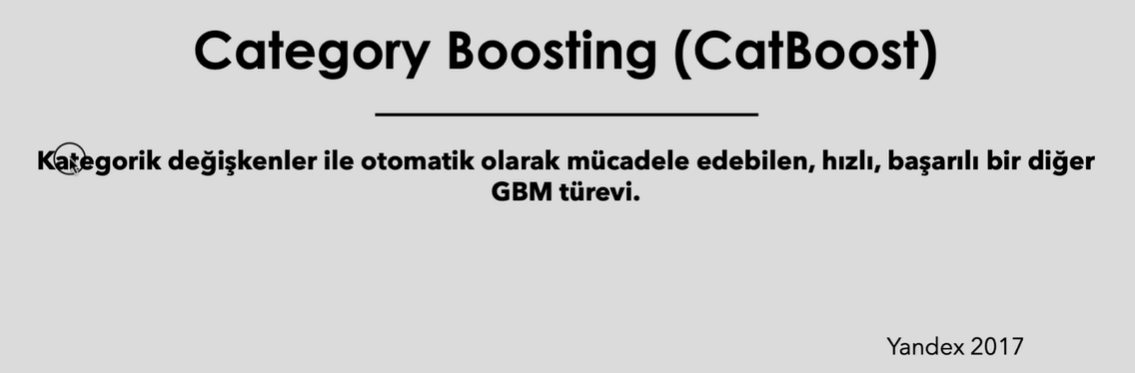

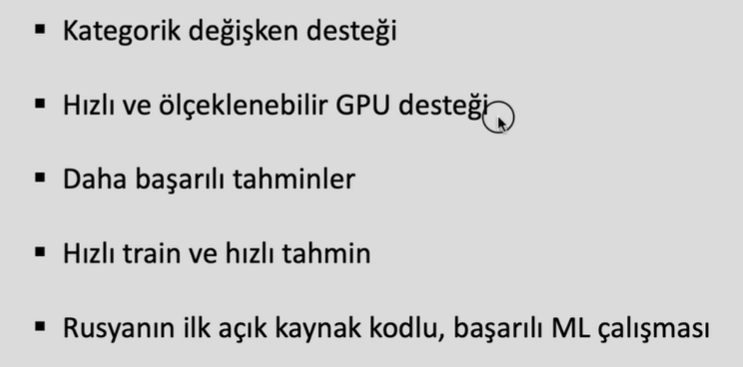

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))